[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/simple-graph.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238187-lesson-2-simple-graph)

# The Simplest Graph

Let's build a simple graph with 3 nodes and one conditional edge.

![Screenshot 2024-08-20 at 3.11.22 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dba5f465f6e9a2482ad935_simple-graph1.png)

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph

## State

First, define the [State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

## Nodes

[Nodes](https://langchain-ai.github.io/langgraph/concepts/low_level/#nodes) are just python functions.

The first positional argument is the state, as defined above.

Because the state is a `TypedDict` with schema as defined above, each node can access the key, `graph_state`, with `state['graph_state']`.

Each node returns a new value of the state key `graph_state`.
  
By default, the new value returned by each node [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior state value.

In [3]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}
def node_3(state):
    print("---Node 4---")
    return {"graph_state": state['graph_state'] +" but!"}
def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" a!"}
def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" bit"}
def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" crazy"}
def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" as"}
def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" well"}

## Edges

[Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges) connect the nodes.

Normal Edges are used if you want to *always* go from, for example, `node_1` to `node_2`.

[Conditional Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#conditional-edges) are used if you want to *optionally* route between nodes.

Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [5]:
import random
from typing import Literal

def decide_reaction(state) -> Literal["node_5", "node_6", "node_7"]:
    user_input = state['graph_state']

    # Decide reaction randomly
    if random.random() < 1/3:
        return "node_5"
    elif random.random() < 2/3:
        return "node_6"
    return "node_7"


## Graph Construction

Now, we build the graph from our [components](
https://langchain-ai.github.io/langgraph/concepts/low_level/) defined above.

The [StateGraph class](https://langchain-ai.github.io/langgraph/concepts/low_level/#stategraph) is the graph class that we can use.

First, we initialize a StateGraph with the `State` class we defined above.

Then, we add our nodes and edges.

We use the [`START` Node, a special node](https://langchain-ai.github.io/langgraph/concepts/low_level/#start-node) that sends user input to the graph, to indicate where to start our graph.

The [`END` Node](https://langchain-ai.github.io/langgraph/concepts/low_level/#end-node) is a special node that represents a terminal node.

Finally, we [compile our graph](https://langchain-ai.github.io/langgraph/concepts/low_level/#compiling-your-graph) to perform a few basic checks on the graph structure.

We can visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid).

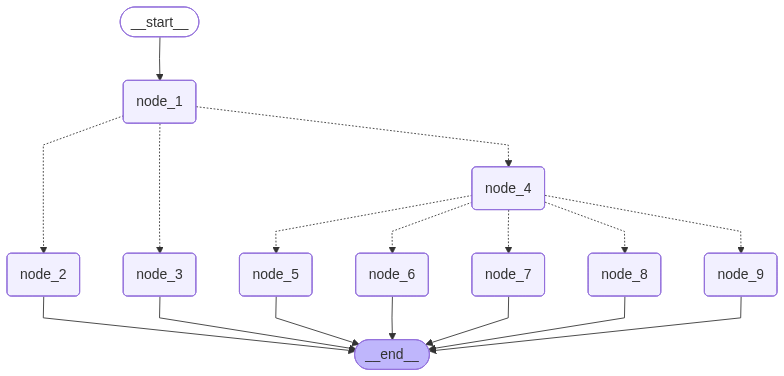

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import random

# ---------------------------
# Define State
# ---------------------------
class State(TypedDict):
    graph_state: str

# ---------------------------
# Define Node Functions
# ---------------------------
def node_1(state: State) -> State:
    print("---Node 1---")
    return {"graph_state": state['graph_state'] + " I am"}

def node_2(state: State) -> State:
    print("---Node 2---")
    return {"graph_state": state['graph_state'] + " happy!"}

def node_3(state: State) -> State:
    print("---Node 3---")
    return {"graph_state": state['graph_state'] + " sad!"}

def node_4(state: State) -> State:
    print("---Node 4---")
    return {"graph_state": state['graph_state'] + " but!"}

def node_5(state: State) -> State:
    print("---Node 5---")
    return {"graph_state": state['graph_state'] + " a!"}

def node_6(state: State) -> State:
    print("---Node 6---")
    return {"graph_state": state['graph_state'] + " bit"}

def node_7(state: State) -> State:
    print("---Node 7---")
    return {"graph_state": state['graph_state'] + " crazy"}

def node_8(state: State) -> State:
    print("---Node 8---")
    return {"graph_state": state['graph_state'] + " as"}

def node_9(state: State) -> State:
    print("---Node 9---")
    return {"graph_state": state['graph_state'] + " well"}

# ---------------------------
# Conditional Decision Nodes
# ---------------------------
def decide_mood(state: State) -> Literal["node_2", "node_3", "node_4"]:
    print("Deciding mood...")
    r = random.random()
    if r < 1/3:
        return "node_2"
    elif r < 2/3:
        return "node_3"
    return "node_4"

def decide_reaction(state: State) -> Literal["node_5", "node_6", "node_7", "node_8", "node_9"]:
    print("Deciding reaction...")
    r = random.random()
    if r < 0.2:
        return "node_5"
    elif r < 0.4:
        return "node_6"
    elif r < 0.6:
        return "node_7"
    elif r < 0.8:
        return "node_8"
    return "node_9"

# ---------------------------
# Build Graph
# ---------------------------
builder = StateGraph(State)

# Add nodes
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)
builder.add_node("node_6", node_6)
builder.add_node("node_7", node_7)
builder.add_node("node_8", node_8)
builder.add_node("node_9", node_9)

# Define edges
builder.add_edge(START, "node_1")                     # Start
builder.add_conditional_edges("node_1", decide_mood)  # Choose mood
builder.add_conditional_edges("node_4", decide_reaction)  # Choose reaction

# End connections
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_5", END)
builder.add_edge("node_6", END)
builder.add_edge("node_7", END)
builder.add_edge("node_8", END)
builder.add_edge("node_9", END)

# ---------------------------
# Compile and Visualize
# ---------------------------
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


## Graph Invocation

The compiled graph implements the [runnable](https://python.langchain.com/docs/concepts/runnables/) protocol.

This provides a standard way to execute LangChain components.

`invoke` is one of the standard methods in this interface.

The input is a dictionary `{"graph_state": "Hi, this is lance."}`, which sets the initial value for our graph state dict.

When `invoke` is called, the graph starts execution from the `START` node.

It progresses through the defined nodes (`node_1`, `node_2`, `node_3`) in order.

The conditional edge will traverse from node `1` to node `2` or `3` using a 50/50 decision rule.

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the `END` node.

In [7]:
!pip install langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 9.1 MB/s eta 0:00:00


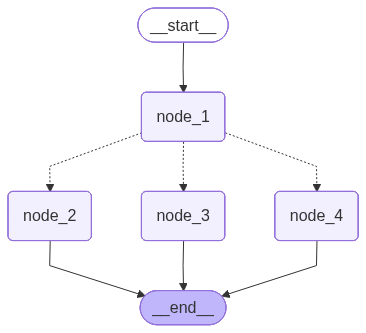

---Node 1---
Deciding mood...
---Node 4---
{'graph_state': 'Hi, this is Lance. I am excited for the party'}


In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import random

# ---------------------------
# Define State
# ---------------------------
class State(TypedDict):
    graph_state: str

# ---------------------------
# Define Node Functions
# ---------------------------
def node_1(state: State) -> State:
    print("---Node 1---")
    return {"graph_state": state['graph_state'] + " I am"}

def node_2(state: State) -> State:
    print("---Node 2---")
    return {"graph_state": state['graph_state'] + " happy!"}

def node_3(state: State) -> State:
    print("---Node 3---")
    return {"graph_state": state['graph_state'] + " sad."}

def node_4(state: State) -> State:
    print("---Node 4---")
    return {"graph_state": state['graph_state'] + " excited for the party"}

# ---------------------------
# Conditional Function
# ---------------------------
def decide_mood(state: State) -> Literal["node_2", "node_3", "node_4"]:
    print("Deciding mood...")
    # Always choose node_4 to match your desired output
    return "node_4"

# ---------------------------
# Build Graph
# ---------------------------
builder = StateGraph(State)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)

# ✅ Compile the graph (this defines `graph`)
graph = builder.compile()

# ---------------------------
# Optional: visualize graph
# ---------------------------
display(Image(graph.get_graph().draw_mermaid_png()))

# ---------------------------
# Invoke the graph
# ---------------------------
final_state = graph.invoke({"graph_state": "Hi, this is Lance."})
print(final_state)


In [9]:
{'graph_state': 'Hi, this is Lance. I am excited for the party.'}

{'graph_state': 'Hi, this is Lance. I am excited for the party.'}

`invoke` runs the entire graph synchronously.

This waits for each step to complete before moving to the next.

It returns the final state of the graph after all nodes have executed.

In this case, it returns the state after `node_3` has completed:

```
{'graph_state': 'Hi, this is Lance. I am sad!'}
```